In [36]:
%matplotlib inline
import os
import sys
import glob
from torchsummary import summary
from PIL import Image
import re

import matplotlib
import matplotlib.pyplot as plt

## Floorplan r3d.zip (newyork)

In [4]:
root_path = './datasets/floor/newyork'
mode = 'train'

In [33]:
files = sorted(glob.glob(os.path.join(root_path, mode) + "/*.*"))

In [45]:
files[:10]

['./datasets/floor/newyork/train/10.jpg',
 './datasets/floor/newyork/train/10_close.png',
 './datasets/floor/newyork/train/10_close_wall.png',
 './datasets/floor/newyork/train/10_multi.png',
 './datasets/floor/newyork/train/10_rooms.png',
 './datasets/floor/newyork/train/10_wall.png',
 './datasets/floor/newyork/train/2.jpg',
 './datasets/floor/newyork/train/28025487.jpg',
 './datasets/floor/newyork/train/28025487_close.png',
 './datasets/floor/newyork/train/28025487_close_wall.png']

In [69]:
regex = re.compile(r'\d+.jpg')

files_selected = list(filter(regex.search, files))

files_selected[:10]

['./datasets/floor/newyork/train/10.jpg',
 './datasets/floor/newyork/train/2.jpg',
 './datasets/floor/newyork/train/28025487.jpg',
 './datasets/floor/newyork/train/28906422.jpg',
 './datasets/floor/newyork/train/3.jpg',
 './datasets/floor/newyork/train/30044076.jpg',
 './datasets/floor/newyork/train/30049107.jpg',
 './datasets/floor/newyork/train/30615117.jpg',
 './datasets/floor/newyork/train/30939153.jpg',
 './datasets/floor/newyork/train/30957516.jpg']

In [90]:
def get_item(path):
    filename, file_extension = os.path.splitext(path)
    return path, "{}_multi.png".format(filename)

In [97]:
def draw_floor(path):
    item = get_item(path)
    img0 = Image.open(item[0])
    img3 = Image.open(item[1])
    
    fig = plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(img0)
    plt.title('original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img3)
    plt.title('mask')
    plt.axis('off')
    plt.show()

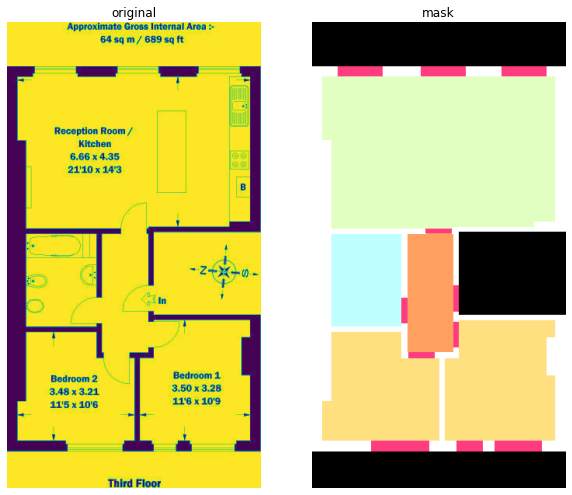

In [100]:
draw_floor(files_selected[12])

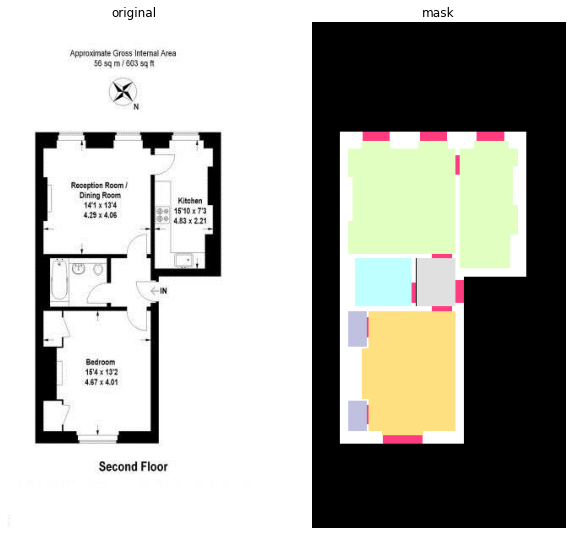

In [160]:
draw_floor(files_selected[18])

In [157]:
len(files_selected)

179

## Mask Inspect

In [102]:
item = get_item(files_selected[0])
img0 = Image.open(item[0])
img3 = Image.open(item[1])

In [109]:
print(img3.size)

(500, 526)


## Floorplan r2v.zip (jp)

In [162]:
# have no input file

## Floorplan Dataset ImagesGT (need manually)

In [161]:
### Use scritps/SVGtoPNG

In [ ]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM

In [111]:
root_path = './datasets/floor/ImagesGT'

In [112]:
files = sorted(glob.glob(root_path + "/*.*"))
files[:10]

['./datasets/floor/ImagesGT/1.png',
 './datasets/floor/ImagesGT/10.png',
 './datasets/floor/ImagesGT/10_gt_9.svg',
 './datasets/floor/ImagesGT/1_gt_14.svg',
 './datasets/floor/ImagesGT/2.png',
 './datasets/floor/ImagesGT/2_gt_16.svg',
 './datasets/floor/ImagesGT/3.png',
 './datasets/floor/ImagesGT/3_gt_12.svg',
 './datasets/floor/ImagesGT/4.png',
 './datasets/floor/ImagesGT/4_gt_7.svg']

In [134]:
img0 = Image.open(files[0])
drawing = svg2rlg(files[3])
# renderPDF.drawToFile(drawing, "file.pdf")
# renderPM.drawToFile(drawing, "/tmp/image.png", fmt="PNG")
# img3 = Image.open('/tmp/image.png')

In [151]:
drawing.width = 256
drawing.height = 256
drawing.getBounds()

(481.5, -697.0, 918.0, -190.0)

In [152]:
drawing.getProperties()

{'background': None,
 'contents': [<reportlab.graphics.shapes.Group at 0x7ff866a09f10>],
 'transform': (1, 0, 0, 1, 0, 0),
 'width': 256,
 'height': 256,
 'hAlign': 'LEFT',
 'vAlign': 'BOTTOM',
 'renderScale': 1.0}

In [153]:
renderPM.drawToFile(drawing, "/tmp/image.png", fmt="PNG")

In [154]:
img3 = Image.open('/tmp/image.png')

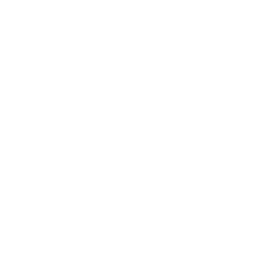

In [155]:
img3